# Run Main.ipynb

In [2]:
%run PreProccesser.ipynb

['C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_Aave.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_BinanceCoin.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_Bitcoin.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_Cardano.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_ChainLink.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_Cosmos.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_CryptocomCoin.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_Dogec

# Forecast

# Initialization

Epoch 1/5
5/5 [==============================] - 5s 154ms/step - loss: 0.2467 - val_loss: 0.2337
Epoch 2/5
5/5 [==============================] - 0s 44ms/step - loss: 0.0962 - val_loss: 0.0714
Epoch 3/5
5/5 [==============================] - 0s 46ms/step - loss: 0.0765 - val_loss: 0.1099
Epoch 4/5
5/5 [==============================] - 0s 48ms/step - loss: 0.0644 - val_loss: 0.0628
Epoch 5/5
5/5 [==============================] - 0s 44ms/step - loss: 0.0511 - val_loss: 0.0640
(25, 1)
1/1 [==============================] - 0s 33ms/step - loss: 0.0660
Epoch 1/5
29/29 [==============================] - 5s 50ms/step - loss: 0.0061 - val_loss: 0.0043
Epoch 2/5
29/29 [==============================] - 1s 32ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 3/5
29/29 [==============================] - 1s 30ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 4/5
29/29 [==============================] - 1s 31ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 5/5
29/29 [==============================] - 1

c:\Users\gahol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.642e+17, tolerance: 7.919e+16
  model = cd_fast.enet_coordinate_descent(


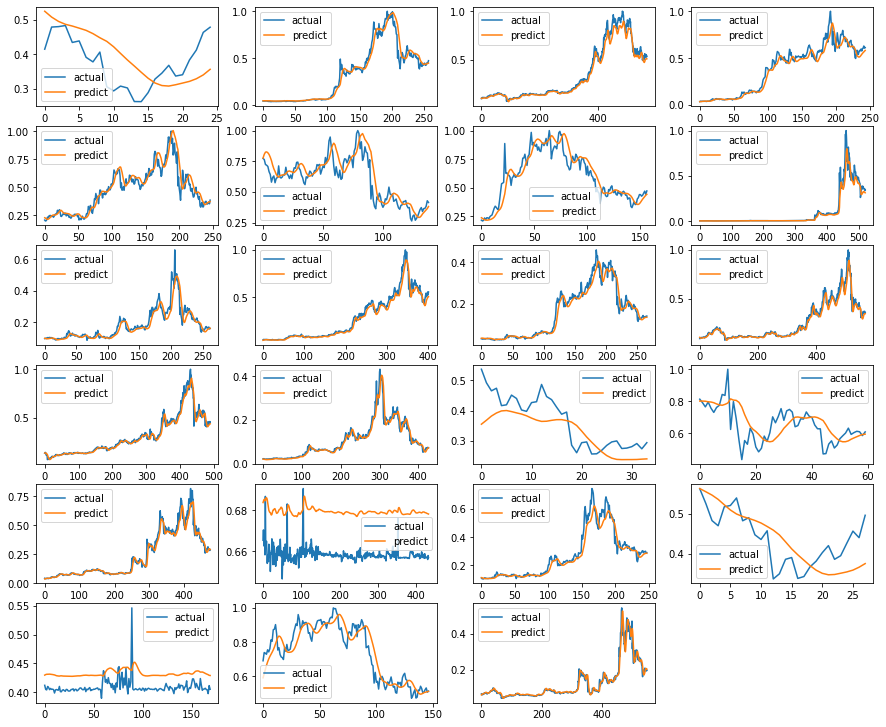

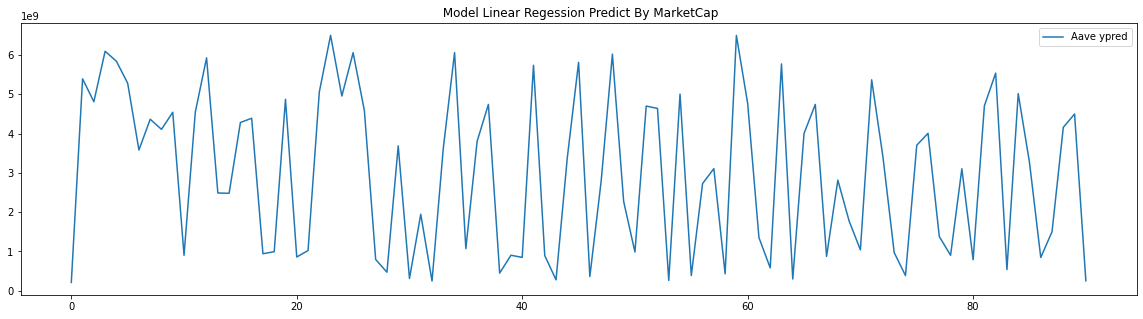

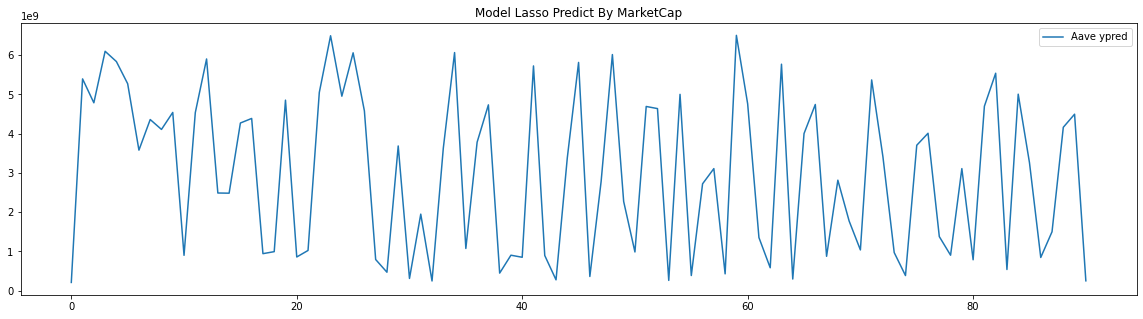

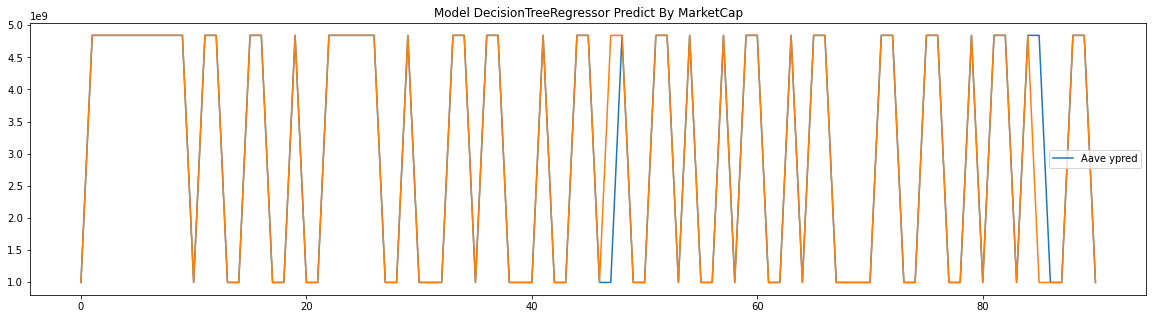

In [6]:
class forecast():  
    def Neural_network(self):
        def process_model_train(data): #argument data read from run function
            sc = MinMaxScaler(feature_range = (0,1))
            train_test = len(data) - int(.2*len(data))
            train = data.iloc[:train_test]            
            test = data.iloc[train_test:]             
            datafilter = data.iloc[:,7:8].values
            train = train.iloc[:,7:8].values    
            test = test.iloc[:,7:8].values      
            data = np.reshape(datafilter,(-1,1))
            train  = np.reshape(train,(-1,1))    
            test = np.reshape(test,(-1,1))        
            sc.fit(data)                
            train = sc.transform(train) 
            test =sc.transform(test)    
            x = []
            y = []
            time = 30                    
            for i in range(time,len(train)): 
                x.append(train[i-time:i,0]) 
                y.append(train[i,0])        
            x, y = np.array(x),np.array(y)              
            x = np.reshape(x,(x.shape[0],x.shape[1],1))    
            model = Sequential()                                              
            model.add(LSTM(128,input_shape = (x.shape[1], x.shape[2])))      
            model.add(Dropout(.3))                                            
            model.add(Dense(1))                                                
            model.add(Activation('linear'))                                   
            model.compile(optimizer= 'adam',loss='mae')        
            history = model.fit(x, y, validation_split=.2, epochs=5, batch_size=32)         
            x=[]
            y=[]
            time=30
            for i in range(time,len(test)):         
                x.append(test[i-time:i,0])
                y.append(test[i,0])
            x,y = np.array(x),np.array(y)              
            x  = np.reshape(x,(x.shape[0],x.shape[1],1))
            pred = model.predict(x) 
            print(pred.shape)            
            result = model.evaluate(x,y)
            return result,pred,y
        def run():
            result ={}
            pred ={}
            actual ={}
            for i in paths:
                result[i],pred[i],actual[i] = process_model_train(data=pd.read_csv(i))             
            plt.figure(figsize=(15,15))
            for i in enumerate(paths):
                plt.subplot(7,4,i[0]+1)
                plt.plot(actual[i[1]],label='actual')
                plt.plot(pred[i[1]],label='predict')
                plt.legend(['actual','predict'])
        run()
    
    def Linear_Regression(self):
        plt.figure(figsize=(20,5))
        def AavePre():
            model=LinearRegression()
            model.fit(XAave_train,YAave_train)
            ypred=model.predict(XAave_test)
            print(pd.DataFrame({'real_value':YAave_test,'pred_value':ypred}))
            print(model.score(XAave_test,YAave_test))
            plt.plot(ypred)
            plt.legend(['Aave ypred'])
        def BinanceCoinPre():
            model=LinearRegression()
            model.fit(XBinanceCoin_train,YBinanceCoin_train)
            ypred=model.predict(XBinanceCoin_test)
            print(pd.DataFrame({'real_value':YBinanceCoin_test,'pred_value':ypred}))
            print(model.score(XBinanceCoin_test,YBinanceCoin_test))
            plt.plot(ypred)
            plt.legend(['BinanceCoin ypred'])
        def BitcoinPre():
            model=LinearRegression()
            model.fit(XBitcoin_train,YBitcoin_train)
            ypred=model.predict(XBitcoin_test)
            print(pd.DataFrame({'real_value':YBitcoin_test,'pred_value':ypred}))
            print(model.score(XBitcoin_test,YBitcoin_test))
            plt.plot(ypred)
            plt.legend(['Bitcoin ypred'])
        def CardanoPre():
            model=LinearRegression()
            model.fit(XCardano_train,YCardano_train)
            ypred=model.predict(XCardano_test)
            print(pd.DataFrame({'real_value':YCardano_test,'pred_value':ypred}))
            print(model.score(XCardano_test,YCardano_test))
            plt.plot(ypred)
            plt.legend(['Cardano ypred'])
        def ChainLinkPre():
            model=LinearRegression()
            model.fit(XChainLink_train,YChainLink_train)
            ypred=model.predict(XChainLink_test)
            print(pd.DataFrame({'real_value':YChainLink_test,'pred_value':ypred}))
            print(model.score(XChainLink_test,YChainLink_test))
            plt.plot(ypred)
            plt.legend(['ChainLink ypred'])
        def CosmosPre():
            model=LinearRegression()
            model.fit(XCosmos_train,YCosmos_train)
            ypred=model.predict(XCosmos_test)
            print(pd.DataFrame({'real_value':YCosmos_test,'pred_value':ypred}))
            print(model.score(XCosmos_test,YCosmos_test))
            plt.plot(ypred)
            plt.legend(['Cosmos ypred'])
        def CryptocomCoinPre():
            model=LinearRegression()
            model.fit(XCryptocomCoin_train,YCryptocomCoin_train)
            ypred=model.predict(XCryptocomCoin_test)
            print(pd.DataFrame({'real_value':YCryptocomCoin_test,'pred_value':ypred}))
            print(model.score(XCryptocomCoin_test,YCryptocomCoin_test))
            plt.plot(ypred)
            plt.legend(['CrytocomCoin ypred'])
        def DogecoinPre():
            model=LinearRegression()
            model.fit(XDogecoin_train,YDogecoin_train)
            ypred=model.predict(XDogecoin_test)
            print(pd.DataFrame({'real_value':YDogecoin_test,'pred_value':ypred}))
            print(model.score(XDogecoin_test,YDogecoin_test))
            plt.plot(ypred)
            plt.legend(['Dogecoin ypred'])
        def EOSPre():
            model=LinearRegression()
            model.fit(XEOS_train,YEOS_train)
            ypred=model.predict(XEOS_test)
            print(pd.DataFrame({'real_value':YEOS_test,'pred_value':ypred}))
            print(model.score(XEOS_test,YEOS_test))
            plt.plot(ypred)
            plt.legend(['EOS ypred'])
        def EthereumPre():
            model=LinearRegression()
            model.fit(XEthereum_train,YEthereum_train)
            ypred=model.predict(XEthereum_test)
            print(pd.DataFrame({'real_value':YEthereum_test,'pred_value':ypred}))
            print(model.score(XEthereum_test,YEthereum_test))
            plt.plot(ypred)
            plt.legend(['Ethereum ypred'])
        def IotaPre():
            model=LinearRegression()
            model.fit(XIota_train,YIota_train)
            ypred=model.predict(XIota_test)
            print(pd.DataFrame({'real_value':YIota_test,'pred_value':ypred}))
            print(model.score(XIota_test,YIota_test))
            plt.plot(ypred)
            plt.legend(['Iota ypred'])
        def LitecoinPre():
            model=LinearRegression()
            model.fit(XLitecoin_train,YLitecoin_train)
            ypred=model.predict(XLitecoin_test)
            print(pd.DataFrame({'real_value':YLitecoin_test,'pred_value':ypred}))
            print(model.score(XLitecoin_test,YLitecoin_test))
            plt.plot(ypred)
            plt.legend(['Litecoin ypred'])
        def MoneroPre():
            model=LinearRegression()
            model.fit(XMonero_train,YMonero_train)
            ypred=model.predict(XMonero_test)
            print(pd.DataFrame({'real_value':YMonero_test,'pred_value':ypred}))
            print(model.score(XMonero_test,YMonero_test))
            plt.plot(ypred)
            plt.legend(['Monero ypred'])
        def NEMPre():
            model=LinearRegression()
            model.fit(XNEM_train,YNEM_train)
            ypred=model.predict(XNEM_test)
            print(pd.DataFrame({'real_value':YNEM_test,'pred_value':ypred}))
            print(model.score(XNEM_test,YNEM_test))
            plt.plot(ypred)
            plt.legend(['NEM ypred'])
        def PolkadotPre():
            model=LinearRegression()
            model.fit(XPolkadot_train,YPolkadot_train)
            ypred=model.predict(XPolkadot_test)
            print(pd.DataFrame({'real_value':YPolkadot_test,'pred_value':ypred}))
            print(model.score(XPolkadot_test,YPolkadot_test))
            plt.plot(ypred)
            plt.legend(['Polkadot ypred'])
        def SolanaPre():
            model=LinearRegression()
            model.fit(XSolana_train,YSolana_train)
            ypred=model.predict(XSolana_test)
            print(pd.DataFrame({'real_value':YSolana_test,'pred_value':ypred}))
            print(model.score(XSolana_test,YSolana_test))
            plt.plot(ypred)
            plt.legend(['Solana ypred'])
        def StellarPre():
            model=LinearRegression()
            model.fit(XStellar_train,YStellar_train)
            ypred=model.predict(XStellar_test)
            print(pd.DataFrame({'real_value':YStellar_test,'pred_value':ypred}))
            print(model.score(XStellar_test,YStellar_test))
            plt.plot(ypred)
            plt.legend(['Stellar ypred'])
        def TetherPre():
            model=LinearRegression()
            model.fit(XTether_train,YTether_train)
            ypred=model.predict(XTether_test)
            print(pd.DataFrame({'real_value':YTether_test,'pred_value':ypred}))
            print(model.score(XTether_test,YTether_test))
            plt.plot(ypred)
            plt.legend(['Tether ypred'])
        def TronPre():
            model=LinearRegression()
            model.fit(XTron_train,YTron_train)
            ypred=model.predict(XTron_test)
            print(pd.DataFrame({'real_value':YTron_test,'pred_value':ypred}))
            print(model.score(XTron_test,YTron_test))
            plt.plot(ypred)
            plt.legend(['Tron ypred'])
        def UniswapPre():
            model=LinearRegression()
            model.fit(XUniswap_train,YUniswap_train)
            ypred=model.predict(XUniswap_test)
            print(pd.DataFrame({'real_value':YUniswap_test,'pred_value':ypred}))
            print(model.score(XUniswap_test,YUniswap_test))
            plt.plot(ypred)
            plt.legend(['Uniswap ypred'])
        def USDCoinPre():
            model=LinearRegression()
            model.fit(XUSDCoin_train,YUSDCoin_train)
            ypred=model.predict(XUSDCoin_test)
            print(pd.DataFrame({'real_value':YUSDCoin_test,'pred_value':ypred}))
            print(model.score(XUSDCoin_test,YUSDCoin_test))
            plt.plot(ypred)
            plt.legend(['USDCoin ypred'])
        def WrappedBitcoinPre():
            model=LinearRegression()
            model.fit(XWrappedBitcoin_train,YWrappedBitcoin_train)
            ypred=model.predict(XWrappedBitcoin_test)
            print(pd.DataFrame({'real_value':YWrappedBitcoin_test,'pred_value':ypred}))
            print(model.score(XWrappedBitcoin_test,YWrappedBitcoin_test))
            plt.plot(ypred)
            plt.legend(['WrappedBitcoin ypred'])
        def XRPPre():
            model=LinearRegression()
            model.fit(XXRP_train,YXRP_train)
            ypred=model.predict(XXRP_test)
            print(pd.DataFrame({'real_value':YXRP_test,'pred_value':ypred}))
            print(model.score(XXRP_test,YXRP_test))
            plt.plot(ypred)
            plt.legend(['XRP ypred'])
        def runAll():
            if __name__ == '__main__':
                plt.title(' Model Linear Regession Predict By MarketCap')
                Thread(AavePre()).start()
                # Thread(BinanceCoinPre()).start()
                # Thread(BitcoinPre()).start()
                # Thread(CardanoPre()).start()
                # Thread(ChainLinkPre()).start()
                # Thread(CosmosPre()).start()
                # Thread(CryptocomCoinPre()).start()
                # Thread(DogecoinPre()).start()
                # Thread(EOSPre()).start()                
                # Thread(EthereumPre()).start()
                # Thread(IotaPre()).start()
                # Thread(LitecoinPre()).start()
                # Thread(MoneroPre()).start()
                # Thread(NEMPre()).start()
                # Thread(PolkadotPre()).start()
                # Thread(SolanaPre()).start()
                # Thread(StellarPre()).start()
                # Thread(TetherPre()).start()
                # Thread(TronPre()).start()
                # Thread(UniswapPre()).start()
                # Thread(USDCoinPre()).start()
                # Thread(WrappedBitcoinPre()).start()
                # Thread(XRPPre()).start()
        runAll()
        
    def Lasso(self):
        plt.figure(figsize=(20,5))
        def AavePre():
            model=Lasso()
            model.fit(XAave_train,YAave_train)
            ypred=model.predict(XAave_test)
            print(pd.DataFrame({'real_value':YAave_test,'pred_value':ypred}))
            print(model.score(XAave_test,YAave_test))
            plt.plot(ypred)
            plt.legend(['Aave ypred'])
        def BinanceCoinPre():
            model=Lasso()
            model.fit(XBinanceCoin_train,YBinanceCoin_train)
            ypred=model.predict(XBinanceCoin_test)
            print(pd.DataFrame({'real_value':YBinanceCoin_test,'pred_value':ypred}))
            print(model.score(XBinanceCoin_test,YBinanceCoin_test))
            plt.plot(ypred)
            plt.legend(['BinanceCoin ypred'])
        def BitcoinPre():
            model=Lasso()
            model.fit(XBitcoin_train,YBitcoin_train)
            ypred=model.predict(XBitcoin_test)
            print(pd.DataFrame({'real_value':YBitcoin_test,'pred_value':ypred}))
            print(model.score(XBitcoin_test,YBitcoin_test))
            plt.plot(ypred)
            plt.legend(['Bitcoin ypred'])
        def CardanoPre():
            model=Lasso()
            model.fit(XCardano_train,YCardano_train)
            ypred=model.predict(XCardano_test)
            print(pd.DataFrame({'real_value':YCardano_test,'pred_value':ypred}))
            print(model.score(XCardano_test,YCardano_test))
            plt.plot(ypred)
            plt.legend(['Cardano ypred'])
        def ChainLinkPre():
            model=Lasso()
            model.fit(XChainLink_train,YChainLink_train)
            ypred=model.predict(XChainLink_test)
            print(pd.DataFrame({'real_value':YChainLink_test,'pred_value':ypred}))
            print(model.score(XChainLink_test,YChainLink_test))
            plt.plot(ypred)
            plt.legend(['ChainLink ypred'])
        def CosmosPre():
            model=Lasso()
            model.fit(XCosmos_train,YCosmos_train)
            ypred=model.predict(XCosmos_test)
            print(pd.DataFrame({'real_value':YCosmos_test,'pred_value':ypred}))
            print(model.score(XCosmos_test,YCosmos_test))
            plt.plot(ypred)
            plt.legend(['Cosmos ypred'])
        def CryptocomCoinPre():
            model=Lasso()
            model.fit(XCryptocomCoin_train,YCryptocomCoin_train)
            ypred=model.predict(XCryptocomCoin_test)
            print(pd.DataFrame({'real_value':YCryptocomCoin_test,'pred_value':ypred}))
            print(model.score(XCryptocomCoin_test,YCryptocomCoin_test))
            plt.plot(ypred)
            plt.legend(['CrytocomCoin ypred'])
        def DogecoinPre():
            model=Lasso()
            model.fit(XDogecoin_train,YDogecoin_train)
            ypred=model.predict(XDogecoin_test)
            print(pd.DataFrame({'real_value':YDogecoin_test,'pred_value':ypred}))
            print(model.score(XDogecoin_test,YDogecoin_test))
            plt.plot(ypred)
            plt.legend(['Dogecoin ypred'])
        def EOSPre():
            model=Lasso()
            model.fit(XEOS_train,YEOS_train)
            ypred=model.predict(XEOS_test)
            print(pd.DataFrame({'real_value':YEOS_test,'pred_value':ypred}))
            print(model.score(XEOS_test,YEOS_test))
            plt.plot(ypred)
            plt.legend(['EOS ypred'])
        def EthereumPre():
            model=Lasso()
            model.fit(XEthereum_train,YEthereum_train)
            ypred=model.predict(XEthereum_test)
            print(pd.DataFrame({'real_value':YEthereum_test,'pred_value':ypred}))
            print(model.score(XEthereum_test,YEthereum_test))
            plt.plot(ypred)
            plt.legend(['Ethereum ypred'])
        def IotaPre():
            model=Lasso()
            model.fit(XIota_train,YIota_train)
            ypred=model.predict(XIota_test)
            print(pd.DataFrame({'real_value':YIota_test,'pred_value':ypred}))
            print(model.score(XIota_test,YIota_test))
            plt.plot(ypred)
            plt.legend(['Iota ypred'])
        def LitecoinPre():
            model=Lasso()
            model.fit(XLitecoin_train,YLitecoin_train)
            ypred=model.predict(XLitecoin_test)
            print(pd.DataFrame({'real_value':YLitecoin_test,'pred_value':ypred}))
            print(model.score(XLitecoin_test,YLitecoin_test))
            plt.plot(ypred)
            plt.legend(['Litecoin ypred'])
        def MoneroPre():
            model=Lasso()
            model.fit(XMonero_train,YMonero_train)
            ypred=model.predict(XMonero_test)
            print(pd.DataFrame({'real_value':YMonero_test,'pred_value':ypred}))
            print(model.score(XMonero_test,YMonero_test))
            plt.plot(ypred)
            plt.legend(['Monero ypred'])
        def NEMPre():
            model=Lasso()
            model.fit(XNEM_train,YNEM_train)
            ypred=model.predict(XNEM_test)
            print(pd.DataFrame({'real_value':YNEM_test,'pred_value':ypred}))
            print(model.score(XNEM_test,YNEM_test))
            plt.plot(ypred)
            plt.legend(['NEM ypred'])
        def PolkadotPre():
            model=Lasso()
            model.fit(XPolkadot_train,YPolkadot_train)
            ypred=model.predict(XPolkadot_test)
            print(pd.DataFrame({'real_value':YPolkadot_test,'pred_value':ypred}))
            print(model.score(XPolkadot_test,YPolkadot_test))
            plt.plot(ypred)
            plt.legend(['Polkadot ypred'])
        def SolanaPre():
            model=Lasso()
            model.fit(XSolana_train,YSolana_train)
            ypred=model.predict(XSolana_test)
            print(pd.DataFrame({'real_value':YSolana_test,'pred_value':ypred}))
            print(model.score(XSolana_test,YSolana_test))
            plt.plot(ypred)
            plt.legend(['Solana ypred'])
        def StellarPre():
            model=Lasso()
            model.fit(XStellar_train,YStellar_train)
            ypred=model.predict(XStellar_test)
            print(pd.DataFrame({'real_value':YStellar_test,'pred_value':ypred}))
            print(model.score(XStellar_test,YStellar_test))
            plt.plot(ypred)
            plt.legend(['Stellar ypred'])
        def TetherPre():
            model=Lasso()
            model.fit(XTether_train,YTether_train)
            ypred=model.predict(XTether_test)
            print(pd.DataFrame({'real_value':YTether_test,'pred_value':ypred}))
            print(model.score(XTether_test,YTether_test))
            plt.plot(ypred)
            plt.legend(['Tether ypred'])
        def TronPre():
            model=Lasso()
            model.fit(XTron_train,YTron_train)
            ypred=model.predict(XTron_test)
            print(pd.DataFrame({'real_value':YTron_test,'pred_value':ypred}))
            print(model.score(XTron_test,YTron_test))
            plt.plot(ypred)
            plt.legend(['Tron ypred'])
        def UniswapPre():
            model=Lasso()
            model.fit(XUniswap_train,YUniswap_train)
            ypred=model.predict(XUniswap_test)
            print(pd.DataFrame({'real_value':YUniswap_test,'pred_value':ypred}))
            print(model.score(XUniswap_test,YUniswap_test))
            plt.plot(ypred)
            plt.legend(['Uniswap ypred'])
        def USDCoinPre():
            model=Lasso()
            model.fit(XUSDCoin_train,YUSDCoin_train)
            ypred=model.predict(XUSDCoin_test)
            print(pd.DataFrame({'real_value':YUSDCoin_test,'pred_value':ypred}))
            print(model.score(XUSDCoin_test,YUSDCoin_test))
            plt.plot(ypred)
            plt.legend(['USDCoin ypred'])
        def WrappedBitcoinPre():
            model=Lasso()
            model.fit(XWrappedBitcoin_train,YWrappedBitcoin_train)
            ypred=model.predict(XWrappedBitcoin_test)
            print(pd.DataFrame({'real_value':YWrappedBitcoin_test,'pred_value':ypred}))
            print(model.score(XWrappedBitcoin_test,YWrappedBitcoin_test))
            plt.plot(ypred)
            plt.legend(['WrappedBitcoin ypred'])
        def XRPPre():
            model=Lasso()
            model.fit(XXRP_train,YXRP_train)
            ypred=model.predict(XXRP_test)
            print(pd.DataFrame({'real_value':YXRP_test,'pred_value':ypred}))
            print(model.score(XXRP_test,YXRP_test))
            plt.plot(ypred)
            plt.legend(['XRP ypred'])
        def runAll():
            if __name__ == '__main__':
                plt.title('Model Lasso Predict By MarketCap')
                Thread(AavePre()).start()
                # Thread(BinanceCoinPre()).start()
                # Thread(BitcoinPre()).start()
                # Thread(CardanoPre()).start()
                # Thread(ChainLinkPre()).start()
                # Thread(CosmosPre()).start()
                # Thread(CryptocomCoinPre()).start()
                # Thread(DogecoinPre()).start()
                # Thread(EOSPre()).start()                
                # Thread(EthereumPre()).start()
                # Thread(IotaPre()).start()
                # Thread(LitecoinPre()).start()
                # Thread(MoneroPre()).start()
                # Thread(NEMPre()).start()
                # Thread(PolkadotPre()).start()
                # Thread(SolanaPre()).start()
                # Thread(StellarPre()).start()
                # Thread(TetherPre()).start()
                # Thread(TronPre()).start()
                # Thread(UniswapPre()).start()
                # Thread(USDCoinPre()).start()
                # Thread(WrappedBitcoinPre()).start()
                # Thread(XRPPre()).start()
        runAll()
    def Decision_Tree_Regressor(self):
        plt.figure(figsize=(20,5))
        def AavePre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XAave_train,YAave_train)
            ypred=model.predict(XAave_test)
            print(pd.DataFrame({'real_value':YAave_test,'pred_value':ypred}))
            print(model.score(XAave_test,YAave_test))
            plt.plot(ypred)
            plt.legend(['Aave ypred'])
        AavePre()
        def BinanceCoinPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XBinanceCoin_train,YBinanceCoin_train)
            ypred=model.predict(XBinanceCoin_test)
            print(pd.DataFrame({'real_value':YBinanceCoin_test,'pred_value':ypred}))
            print(model.score(XBinanceCoin_test,YBinanceCoin_test))
            plt.plot(ypred)
            plt.legend(['BinanceCoin ypred'])
        def BitcoinPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XBitcoin_train,YBitcoin_train)
            ypred=model.predict(XBitcoin_test)
            print(pd.DataFrame({'real_value':YBitcoin_test,'pred_value':ypred}))
            print(model.score(XBitcoin_test,YBitcoin_test))
            plt.plot(ypred)
            plt.legend(['Bitcoin ypred'])
        def CardanoPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XCardano_train,YCardano_train)
            ypred=model.predict(XCardano_test)
            print(pd.DataFrame({'real_value':YCardano_test,'pred_value':ypred}))
            print(model.score(XCardano_test,YCardano_test))
            plt.plot(ypred)
            plt.legend(['Cardano ypred'])
        def ChainLinkPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XChainLink_train,YChainLink_train)
            ypred=model.predict(XChainLink_test)
            print(pd.DataFrame({'real_value':YChainLink_test,'pred_value':ypred}))
            print(model.score(XChainLink_test,YChainLink_test))
            plt.plot(ypred)
            plt.legend(['ChainLink ypred'])
        def CosmosPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XCosmos_train,YCosmos_train)
            ypred=model.predict(XCosmos_test)
            print(pd.DataFrame({'real_value':YCosmos_test,'pred_value':ypred}))
            print(model.score(XCosmos_test,YCosmos_test))
            plt.plot(ypred)
            plt.legend(['Cosmos ypred'])
        def CryptocomCoinPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XCryptocomCoin_train,YCryptocomCoin_train)
            ypred=model.predict(XCryptocomCoin_test)
            print(pd.DataFrame({'real_value':YCryptocomCoin_test,'pred_value':ypred}))
            print(model.score(XCryptocomCoin_test,YCryptocomCoin_test))
            plt.plot(ypred)
            plt.legend(['CrytocomCoin ypred'])
        def DogecoinPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XDogecoin_train,YDogecoin_train)
            ypred=model.predict(XDogecoin_test)
            print(pd.DataFrame({'real_value':YDogecoin_test,'pred_value':ypred}))
            print(model.score(XDogecoin_test,YDogecoin_test))
            plt.plot(ypred)
            plt.legend(['Dogecoin ypred'])
        def EOSPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XEOS_train,YEOS_train)
            ypred=model.predict(XEOS_test)
            print(pd.DataFrame({'real_value':YEOS_test,'pred_value':ypred}))
            print(model.score(XEOS_test,YEOS_test))
            plt.plot(ypred)
            plt.legend(['EOS ypred'])
        def EthereumPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XEthereum_train,YEthereum_train)
            ypred=model.predict(XEthereum_test)
            print(pd.DataFrame({'real_value':YEthereum_test,'pred_value':ypred}))
            print(model.score(XEthereum_test,YEthereum_test))
            plt.plot(ypred)
            plt.legend(['Ethereum ypred'])
        def IotaPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XIota_train,YIota_train)
            ypred=model.predict(XIota_test)
            print(pd.DataFrame({'real_value':YIota_test,'pred_value':ypred}))
            print(model.score(XIota_test,YIota_test))
            plt.plot(ypred)
            plt.legend(['Iota ypred'])
        def LitecoinPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XLitecoin_train,YLitecoin_train)
            ypred=model.predict(XLitecoin_test)
            print(pd.DataFrame({'real_value':YLitecoin_test,'pred_value':ypred}))
            print(model.score(XLitecoin_test,YLitecoin_test))
            plt.plot(ypred)
            plt.legend(['Litecoin ypred'])
        def MoneroPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XMonero_train,YMonero_train)
            ypred=model.predict(XMonero_test)
            print(pd.DataFrame({'real_value':YMonero_test,'pred_value':ypred}))
            print(model.score(XMonero_test,YMonero_test))
            plt.plot(ypred)
            plt.legend(['Monero ypred'])
        def NEMPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XNEM_train,YNEM_train)
            ypred=model.predict(XNEM_test)
            print(pd.DataFrame({'real_value':YNEM_test,'pred_value':ypred}))
            print(model.score(XNEM_test,YNEM_test))
            plt.plot(ypred)
            plt.legend(['NEM ypred'])
        def PolkadotPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XPolkadot_train,YPolkadot_train)
            ypred=model.predict(XPolkadot_test)
            print(pd.DataFrame({'real_value':YPolkadot_test,'pred_value':ypred}))
            print(model.score(XPolkadot_test,YPolkadot_test))
            plt.plot(ypred)
            plt.legend(['Polkadot ypred'])
        def SolanaPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XSolana_train,YSolana_train)
            ypred=model.predict(XSolana_test)
            print(pd.DataFrame({'real_value':YSolana_test,'pred_value':ypred}))
            print(model.score(XSolana_test,YSolana_test))
            plt.plot(ypred)
            plt.legend(['Solana ypred'])
        def StellarPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XStellar_train,YStellar_train)
            ypred=model.predict(XStellar_test)
            print(pd.DataFrame({'real_value':YStellar_test,'pred_value':ypred}))
            print(model.score(XStellar_test,YStellar_test))
            plt.plot(ypred)
            plt.legend(['Stellar ypred'])
        def TetherPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XTether_train,YTether_train)
            ypred=model.predict(XTether_test)
            print(pd.DataFrame({'real_value':YTether_test,'pred_value':ypred}))
            print(model.score(XTether_test,YTether_test))
            plt.plot(ypred)
            plt.legend(['Tether ypred'])
        def TronPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XTron_train,YTron_train)
            ypred=model.predict(XTron_test)
            print(pd.DataFrame({'real_value':YTron_test,'pred_value':ypred}))
            print(model.score(XTron_test,YTron_test))
            plt.plot(ypred)
            plt.legend(['Tron ypred'])
        def UniswapPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XUniswap_train,YUniswap_train)
            ypred=model.predict(XUniswap_test)
            print(pd.DataFrame({'real_value':YUniswap_test,'pred_value':ypred}))
            print(model.score(XUniswap_test,YUniswap_test))
            plt.plot(ypred)
            plt.legend(['Uniswap ypred'])
        def USDCoinPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XUSDCoin_train,YUSDCoin_train)
            ypred=model.predict(XUSDCoin_test)
            print(pd.DataFrame({'real_value':YUSDCoin_test,'pred_value':ypred}))
            print(model.score(XUSDCoin_test,YUSDCoin_test))
            plt.plot(ypred)
            plt.legend(['USDCoin ypred'])
        def WrappedBitcoinPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XWrappedBitcoin_train,YWrappedBitcoin_train)
            ypred=model.predict(XWrappedBitcoin_test)
            print(pd.DataFrame({'real_value':YWrappedBitcoin_test,'pred_value':ypred}))
            print(model.score(XWrappedBitcoin_test,YWrappedBitcoin_test))
            plt.plot(ypred)
            plt.legend(['WrappedBitcoin ypred'])
        def XRPPre():
            model=DecisionTreeRegressor(max_depth=1)
            model.fit(XXRP_train,YXRP_train)
            ypred=model.predict(XXRP_test)
            print(pd.DataFrame({'real_value':YXRP_test,'pred_value':ypred}))
            print(model.score(XXRP_test,YXRP_test))
            plt.plot(ypred)
            plt.legend(['XRP ypred'])
        def runAll():
            if __name__ == '__main__':
                plt.title('Model DecisionTreeRegressor Predict By MarketCap')
                Thread(AavePre()).start()
                # Thread(BinanceCoinPre()).start()
                # Thread(BitcoinPre()).start()
                # Thread(CardanoPre()).start()
                # Thread(ChainLinkPre()).start()
                # Thread(CosmosPre()).start()
                # Thread(CryptocomCoinPre()).start()
                # Thread(DogecoinPre()).start()
                # Thread(EOSPre()).start()                
                # Thread(EthereumPre()).start()
                # Thread(IotaPre()).start()
                # Thread(LitecoinPre()).start()
                # Thread(MoneroPre()).start()
                # Thread(NEMPre()).start()
                # Thread(PolkadotPre()).start()
                # Thread(SolanaPre()).start()
                # Thread(StellarPre()).start()
                # Thread(TetherPre()).start()
                # Thread(TronPre()).start()
                # Thread(UniswapPre()).start()
                # Thread(USDCoinPre()).start()
                # Thread(WrappedBitcoinPre()).start()
                # Thread(XRPPre()).start()
        runAll()




fc = forecast()
fc.Neural_network()
fc.Linear_Regression()
fc.Lasso()
fc.Decision_Tree_Regressor()
